In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

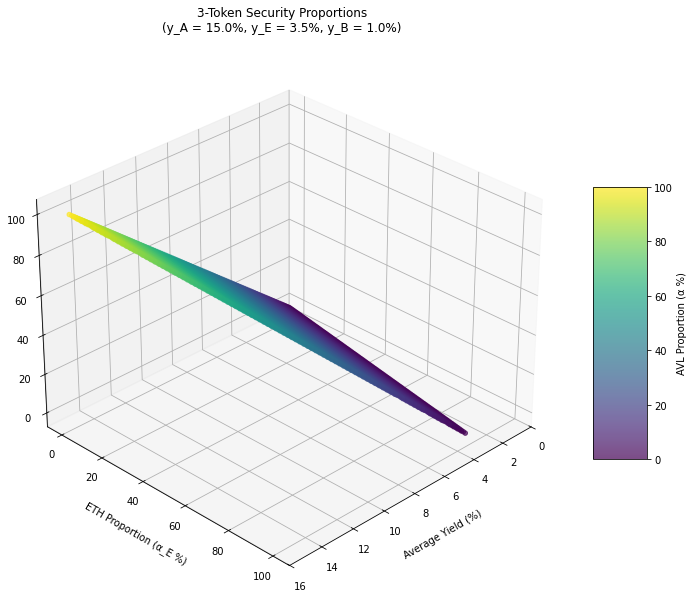

In [4]:
def plot_3token_3d(y_A=0.15, y_E=0.035, y_B=0.01):
    """
    Plots 3D surface of AVL security percentage vs average yield and ETH proportion
    
    Args:
        y_A (float): AVL yield (default: 0.15)
        y_E (float): ETH yield (default: 0.035)
        y_B (float): BTC yield (default: 0.01)
    """
    # Create grid of alpha values
    alpha = np.linspace(0, 1, 100)  # AVL proportion
    alpha_E = np.linspace(0, 1, 100)  # ETH proportion
    alpha, alpha_E = np.meshgrid(alpha, alpha_E)
    
    # Calculate BTC proportion (remaining allocation)
    alpha_B = 1 - alpha - alpha_E
    # Calculate average yield
    avg_yield = alpha*y_A + alpha_E*y_E + alpha_B*y_B
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Flatten arrays and filter valid entries using mask
    mask = (alpha + alpha_E) <= 1  # Recreate the mask
    avg_yield_valid = avg_yield[mask].flatten()
    alpha_E_valid = alpha_E[mask].flatten()
    alpha_valid = alpha[mask].flatten()
    
    # Plot surface with colormap using filtered data
    surf = ax.scatter(avg_yield_valid*100, alpha_E_valid*100, alpha_valid*100, 
                     c=alpha_valid*100, cmap='viridis', alpha=0.7)
    
    # Add labels and title
    ax.set_xlabel('Average Yield (%)', labelpad=10)
    ax.set_ylabel('ETH Proportion (α_E %)', labelpad=10)
    ax.set_zlabel('AVL Proportion (α %)', labelpad=10)
    plt.title(f'3-Token Security Proportions\n(y_A = {y_A*100:.1f}%, y_E = {y_E*100:.1f}%, y_B = {y_B*100:.1f}%)', pad=20)
    
    # Add colorbar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    cbar.set_label('AVL Proportion (α %)')
    
    # Set viewing angle
    ax.view_init(30, 45)
    
    plt.show()


plot_3token_3d(y_A=0.15, y_E=0.035, y_B=0.01)

In [5]:
import plotly.graph_objects as go

def plot_3token_3d(y_A=0.15, y_E=0.035, y_B=0.01):
    """
    Interactive 3D plot using Plotly
    """
    # Create grid and calculate values (existing code)
    alpha = np.linspace(0, 1, 100)
    alpha_E = np.linspace(0, 1, 100)
    alpha, alpha_E = np.meshgrid(alpha, alpha_E)
    alpha_B = 1 - alpha - alpha_E
    avg_yield = alpha*y_A + alpha_E*y_E + alpha_B*y_B
    
    # Filter valid points (existing code)
    mask = (alpha + alpha_E) <= 1
    avg_yield_valid = avg_yield[mask].flatten()
    alpha_E_valid = alpha_E[mask].flatten()
    alpha_valid = alpha[mask].flatten()

    # Create interactive 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=avg_yield_valid*100,        # Average Yield
        y=alpha_E_valid*100,          # ETH Proportion
        z=alpha_valid*100,            # AVL Proportion
        mode='markers',
        marker=dict(
            size=3,
            color=alpha_valid*100,    # Color by AVL proportion
            colorscale='Viridis',
            opacity=0.7,
            colorbar=dict(title='AVL Proportion (%)')
        )
    )])
    
    # Configure layout
    fig.update_layout(
        title=f'3-Token Security Proportions<br>y_A = {y_A*100:.1f}%, y_E = {y_E*100:.1f}%, y_B = {y_B*100:.1f}%',
        scene=dict(
            xaxis_title='Average Yield (%)',
            yaxis_title='ETH Proportion (%)',
            zaxis_title='AVL Proportion (%)',
            camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))  # Initial view angle
        ),
        width=1000,
        height=800
    )
    
    # Show interactive plot
    fig.show()


plot_3token_3d(y_A=0.15, y_E=0.035, y_B=0.01)

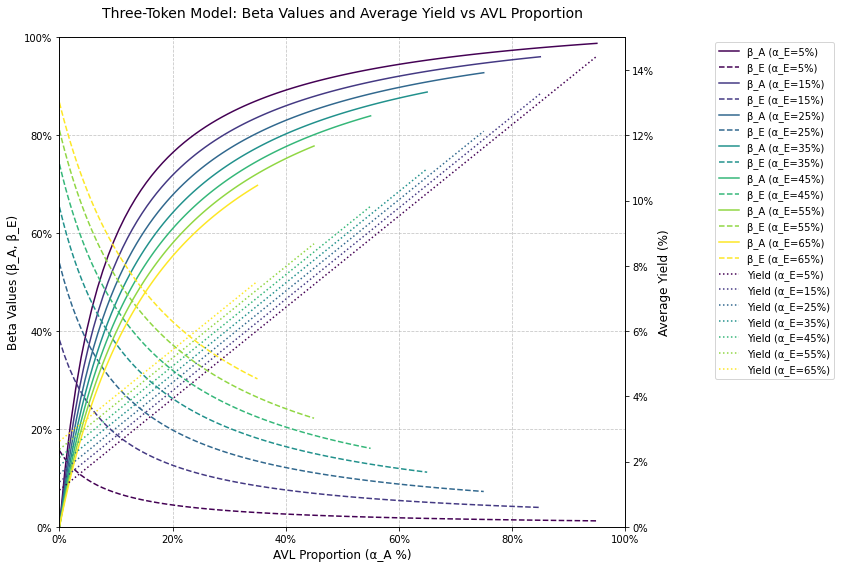

In [6]:
def plot_three_token_beta():
    # Fixed yield parameters
    y_A = 0.15  # AVL yield
    y_E = 0.035  # ETH yield
    y_B = 0.01   # BTC yield
    
    # ETH proportion cases (α_E)
    alpha_E_cases = np.arange(0.05, 0.70, 0.10)  # 5%, 15%, 25%,...,65%
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()
    
    # Color map for different α_E cases
    colors = plt.cm.viridis(np.linspace(0, 1, len(alpha_E_cases)))
    
    # Plot for each α_E case
    for idx, alpha_E in enumerate(alpha_E_cases):
        # AVL proportion range (α_A can't exceed 1 - α_E)
        alpha_A = np.linspace(0, 1 - alpha_E, 100)
        
        # Calculate average yield and beta values
        avg_yield = alpha_A*y_A + alpha_E*y_E + (1 - alpha_A - alpha_E)*y_B
        beta_A = (alpha_A * y_A) / avg_yield
        beta_E = (alpha_E * y_E) / avg_yield
        
        # Plot β_A and β_E on primary axis
        ax1.plot(alpha_A*100, beta_A, color=colors[idx], linestyle='-',
                label=f'β_A (α_E={alpha_E*100:.0f}%)')
        ax1.plot(alpha_A*100, beta_E, color=colors[idx], linestyle='--',
                label=f'β_E (α_E={alpha_E*100:.0f}%)')
        
        # Plot average yield on secondary axis
        ax2.plot(alpha_A*100, avg_yield*100, color=colors[idx], linestyle=':',
                label=f'Yield (α_E={alpha_E*100:.0f}%)')

    # Axis labels and titles
    ax1.set_xlabel('AVL Proportion (α_A %)', fontsize=12)
    ax1.set_ylabel('Beta Values (β_A, β_E)', fontsize=12)
    ax2.set_ylabel('Average Yield (%)', fontsize=12)
    plt.title('Three-Token Model: Beta Values and Average Yield vs AVL Proportion', fontsize=14, pad=20)

    # Legend handling
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', bbox_to_anchor=(1.15, 1))

    # Grid and axis limits
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 15)  # Adjust based on yield range
    
    # Add percentage formatting
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

    plt.tight_layout()
    plt.show()

plot_three_token_beta()

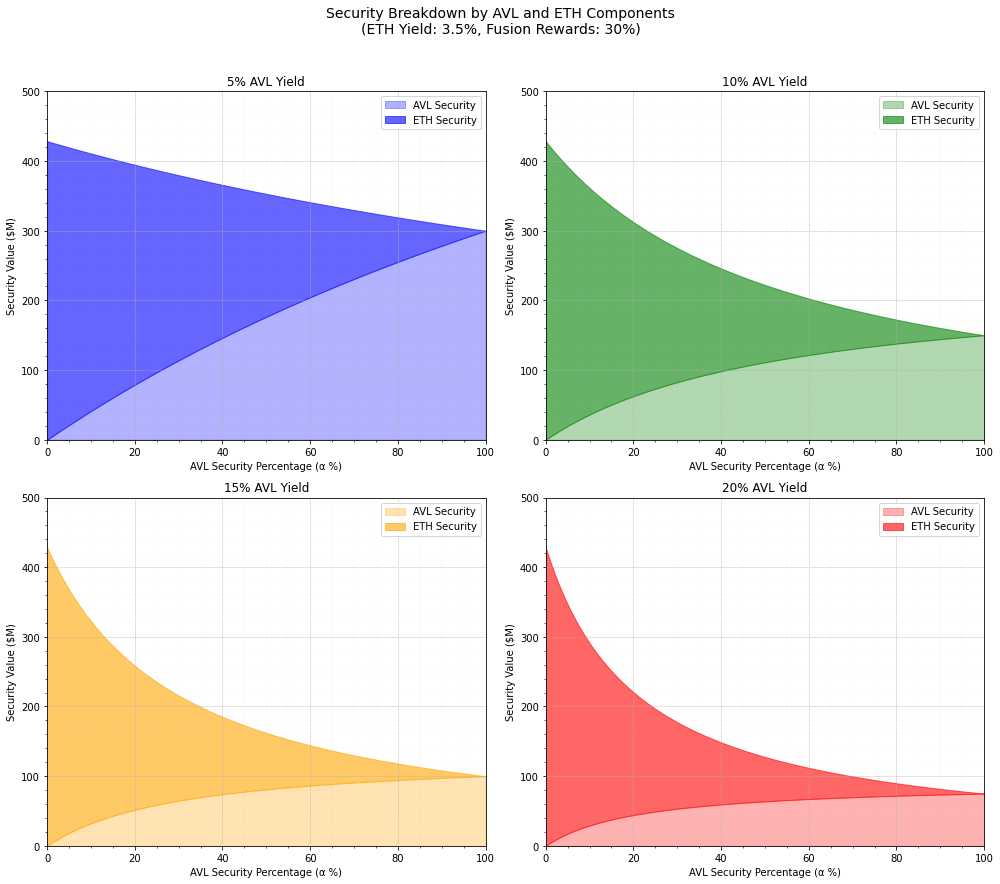

In [27]:
def plot_security_breakdown(eth_yield=0.035, total_supply=10e9, avl_price=0.1, 
                           inflation_rate=0.05, fusion_rewards_pct=0.30):
    """
    Plots stacked area curves in 2x2 layout showing AVL and ETH security breakdown
    
    Args:
        eth_yield (float): ETH yield percentage (default: 0.035)
        total_supply (float): Total supply of AVL tokens (default: 10e9)
        avl_price (float): Price per AVL token in USD (default: 0.1)
        inflation_rate (float): Annual inflation rate (default: 0.05)
        fusion_rewards_pct (float): Percentage of rewards allocated to fusion (default: 0.30)
    """
    # AVL yield cases to plot
    avl_yields = [0.05, 0.10, 0.15, 0.20]
    colors = ['blue', 'green', 'orange', 'red']
    titles = ['5% AVL Yield', '10% AVL Yield', '15% AVL Yield', '20% AVL Yield']
    
    # Create figure and subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()  # Flatten to 1D array for easier iteration
    
    # Alpha values from 0% to 100%
    alpha_values = np.linspace(0, 1, 500)
    
    # Plot for each AVL yield case
    for idx, (avl_yield, color, title) in enumerate(zip(avl_yields, colors, titles)):
        ax = axes[idx]
        
        # Calculate average yield
        avg_yield = alpha_values * avl_yield + (1 - alpha_values) * eth_yield
        
        # Calculate total security
        total_security = (fusion_rewards_pct * total_supply * avl_price * inflation_rate) / avg_yield
        
        # Calculate AVL and ETH security components
        avl_security = total_security * alpha_values
        eth_security = total_security * (1 - alpha_values)
        
        # Plot stacked areas
        ax.fill_between(alpha_values * 100, 0, avl_security / 1e6, 
                       color=color, alpha=0.3, label='AVL Security')
        ax.fill_between(alpha_values * 100, avl_security / 1e6, total_security / 1e6,
                       color=color, alpha=0.6, label='ETH Security')
        
        # Add subplot title and labels
        ax.set_title(title)
        ax.set_xlabel('AVL Security Percentage (α %)')
        ax.set_ylabel('Security Value ($M)')
        
        # Add grid and legend
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
        ax.legend()
        
        # Set axis limits
        ax.set_xlim(0, 100)
        ax.set_ylim(0, 500)  # Adjust based on your security range
    
    # Add main title
    fig.suptitle(f'Security Breakdown by AVL and ETH Components\n'
                f'(ETH Yield: {eth_yield*100:.1f}%, Fusion Rewards: {fusion_rewards_pct*100:.0f}%)',
                y=1.02, fontsize=14)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_security_breakdown(eth_yield=0.035, total_supply=10e9, avl_price=0.1, 
                       inflation_rate=0.05, fusion_rewards_pct=0.30)

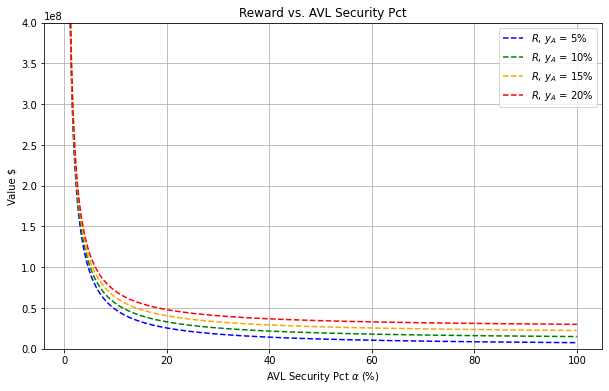

In [26]:
avl_price = 0.1
FDV = 10000000000 * avl_price
k = 0.15 * FDV  # αD = 15% * FDV
y_E = 0.03  # y_E = 3%
y_A_list = [0.05, 0.10, 0.15, 0.20]  # y_A = 5%, 10%, 15%, 20%

y_min = y_E + 0.0001
y_max = max(y_A_list) - 0.0001
alpha_values = np.linspace(0.01, 1.0, 500)


plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']

for idx, y_A in enumerate(y_A_list):
    y_values = alpha_values * y_A + (1 - alpha_values) * y_E
    D_values = k / alpha_values
    R_values = D_values * y_values
    
    #plt.plot(alpha_values * 100, D_values, color=colors[idx], linestyle='-', label=f'$D$, $y_A$ = {y_A * 100:.0f}%')
    plt.plot(alpha_values * 100, R_values, color=colors[idx], linestyle='--', label=f'$R$, $y_A$ = {y_A * 100:.0f}%')


plt.xlabel('AVL Security Pct $\\alpha$ (%)')
plt.ylabel('Value $')
plt.title('Reward vs. AVL Security Pct')

plt.legend()


plt.grid(True)

plt.ylim(0, 0.4*FDV)
plt.show()

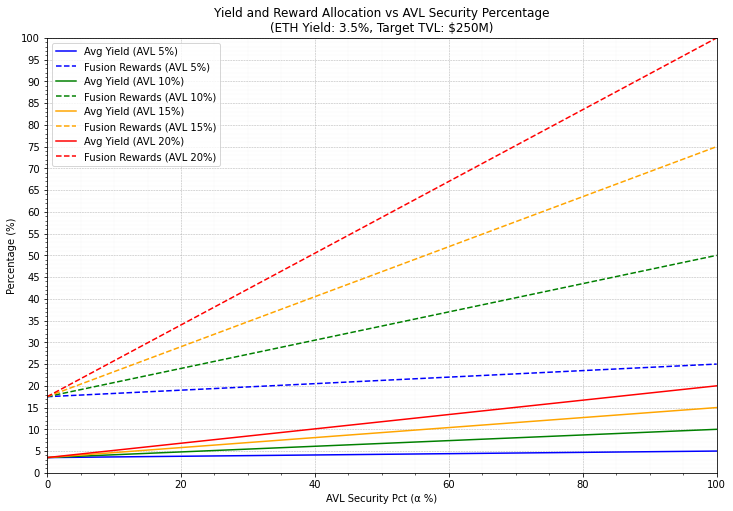

In [16]:
def plot_yield_and_fusion_rewards(target_TVL, eth_yield=0.035, total_supply=10e9, 
                                 avl_price=0.1, inflation_rate=0.05):
    """
    Plots yield and fusion rewards for multiple AVL yield cases
    
    Args:
        target_TVL (float): Target Total Value Locked
        eth_yield (float): ETH yield percentage (default: 0.035)
        total_supply (float): Total supply of AVL tokens (default: 10e9)
        avl_price (float): Price per AVL token in USD (default: 0.1)
        inflation_rate (float): Annual inflation rate (default: 0.05)
    """
    # AVL yield cases to plot
    avl_yields = [0.05, 0.10, 0.15, 0.20]
    colors = ['blue', 'green', 'orange', 'red']
    
    # Alpha values from 0% to 100%
    alpha_values = np.linspace(0, 1, 500)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each AVL yield case
    for avl_yield, color in zip(avl_yields, colors):
        # Calculate average yield
        avg_yield = alpha_values * avl_yield + (1 - alpha_values) * eth_yield
        
        # Calculate % of Rewards Allocated to Fusion
        fusion_rewards_pct = (target_TVL * avg_yield) / (total_supply * avl_price * inflation_rate)
        
        # Plot average yield
        plt.plot(alpha_values * 100, avg_yield * 100, color=color,
                linestyle='-', label=f'Avg Yield (AVL {avl_yield*100:.0f}%)')
        
        # Plot % of Rewards Allocated to Fusion
        plt.plot(alpha_values * 100, fusion_rewards_pct * 100, color=color,
                linestyle='--', label=f'Fusion Rewards (AVL {avl_yield*100:.0f}%)')
    
    # Add labels and title
    plt.xlabel('AVL Security Pct (α %)')
    plt.ylabel('Percentage (%)')
    plt.title('Yield and Reward Allocation vs AVL Security Percentage\n'
             f'(ETH Yield: {eth_yield*100:.1f}%, Target TVL: ${target_TVL/1e6:.0f}M)')
    
    # Add legend and grid
    plt.legend()
    
    # Set axis limits and grid
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    # Add finer grid and y-axis ticks
    plt.yticks(np.arange(0, 101, 5))  # Ticks every 5%
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
    
    plt.show()

plot_yield_and_fusion_rewards(250e6, eth_yield=0.035, total_supply=10e9, 
                                 avl_price=0.1, inflation_rate=0.05)

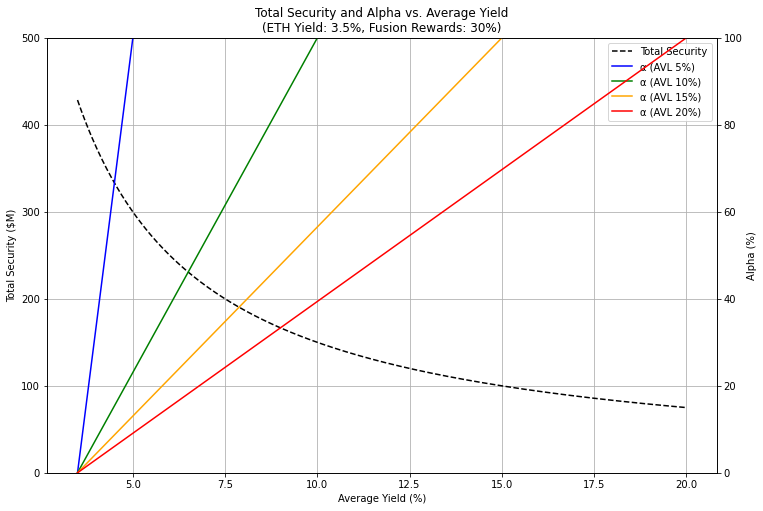

In [14]:
def plot_security_and_alpha(eth_yield=0.035, total_supply=10e9, 
                           avl_price=0.1, inflation_rate=0.05,
                           fusion_rewards_pct=0.30):

    # AVL yield cases to plot
    avl_yields = [0.05, 0.10, 0.15, 0.20]
    colors = ['blue', 'green', 'orange', 'red']
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(12, 8))
    
    # Create secondary axis
    ax2 = ax1.twinx()
    
    # Plot total security once (same for all cases)
    alpha_values = np.linspace(0, 1, 500)
    avg_yield = alpha_values * 0.2 + (1 - alpha_values) * eth_yield  # Using middle case for reference
    total_security = (total_supply * avl_price * inflation_rate * 
                     fusion_rewards_pct) / avg_yield
    ax1.plot(avg_yield * 100, total_security / 1e6, '--', color='black',
            label='Total Security')
    
    # Plot alpha for each AVL yield case
    for avl_yield, color in zip(avl_yields, colors):
        # Calculate average yield
        avg_yield = alpha_values * avl_yield + (1 - alpha_values) * eth_yield
        
        # Calculate alpha
        alpha_calc = (avg_yield - eth_yield) / (avl_yield - eth_yield)
        
        # Plot alpha (solid line)
        ax2.plot(avg_yield * 100, alpha_calc * 100, '-', color=color,
                label=f'α (AVL {avl_yield*100:.0f}%)')
    
    # Set labels and title
    ax1.set_xlabel('Average Yield (%)')
    ax1.set_ylabel('Total Security ($M)', color='black')
    ax2.set_ylabel('Alpha (%)', color='black')
    plt.title('Total Security and Alpha vs. Average Yield\n'
             f'(ETH Yield: {eth_yield*100:.1f}%, Fusion Rewards: {fusion_rewards_pct*100:.0f}%)')
    
    # Set axis limits
    ax1.set_ylim(0, 500)  # Adjust based on your security range
    ax2.set_ylim(0, 100)
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    
    # Add grid
    ax1.grid(True)
    
    plt.show()

plot_security_and_alpha(eth_yield=0.035, total_supply=10e9, 
                           avl_price=0.1, inflation_rate=0.05,
                           fusion_rewards_pct=0.30)

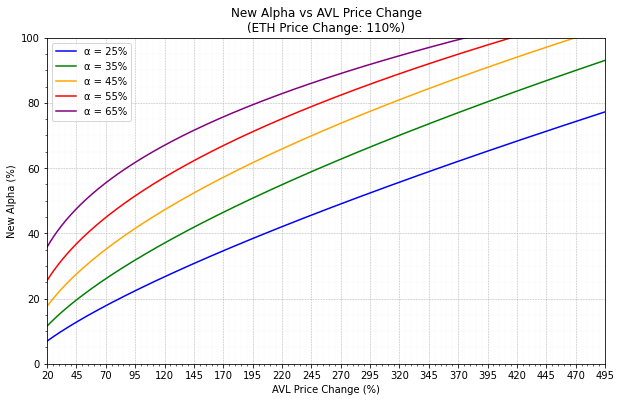

In [33]:
def plot_alpha_vs_avl_price(eth_yield=0.035, eth_price_change_pct=1.1):
    """
    Plots new alpha vs AVL price change for multiple alpha cases
    
    Args:
        eth_yield (float): Initial ETH yield percentage (default: 0.035)
        eth_price_change_pct (float): ETH price change percentage (default: 1.1)
    """
    # Alpha cases to plot
    alpha_cases = [0.25, 0.35, 0.45, 0.55, 0.65]
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    
    # AVL price change range from 50% to 200%
    avl_price_changes = np.linspace(0.2, 5.0, 500)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot for each alpha case
    for alpha, color in zip(alpha_cases, colors):
        # Calculate intermediate output and new alpha
        intermediate_output = (1 - alpha) * (np.log(avl_price_changes) - np.log(eth_price_change_pct))
        new_alpha = np.exp(intermediate_output) * alpha
        
        # Plot new alpha vs AVL price change
        plt.plot(avl_price_changes * 100, new_alpha * 100, color=color,
                label=f'α = {alpha*100:.0f}%')
    
    # Add labels and title
    plt.xlabel('AVL Price Change (%)')
    plt.ylabel('New Alpha (%)')
    plt.title(f'New Alpha vs AVL Price Change\n'
             f'(ETH Price Change: {eth_price_change_pct*100:.0f}%)')
    
    # Add grid and legend
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
    plt.legend()
    
    # Set axis limits
    plt.xlim(50, 200)
    plt.ylim(0, 100)
    
    # Add x-axis ticks every 25% for cleaner layout
    plt.xticks(np.arange(20, 501, 25))
    
    plt.show()


plot_alpha_vs_avl_price(eth_yield=0.035, eth_price_change_pct=1.1)

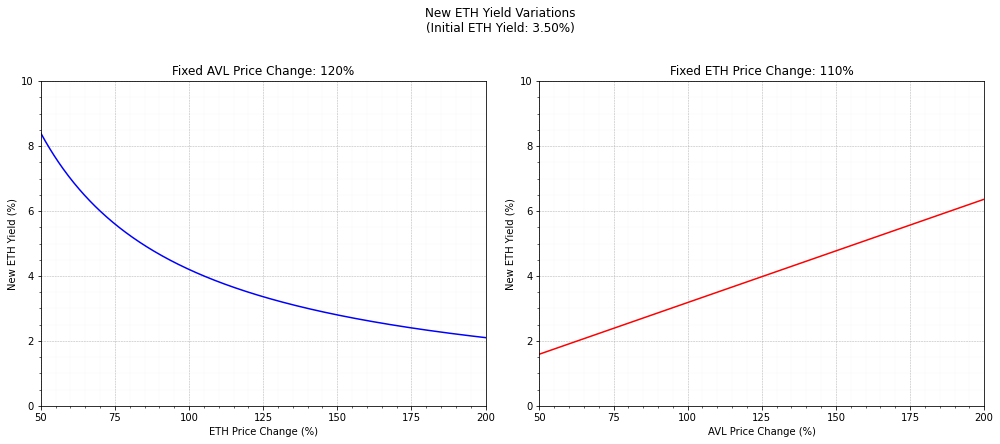

In [36]:
def plot_eth_yield_variations(eth_yield=0.035, fixed_avl_pct=1.2, fixed_eth_pct=1.1):
    """
    Plots new ETH yield in 1x2 layout with fixed AVL and ETH price changes
    
    Args:
        eth_yield (float): Initial ETH yield percentage (default: 0.035)
        fixed_avl_pct (float): Fixed AVL price change percentage (default: 1.2)
        fixed_eth_pct (float): Fixed ETH price change percentage (default: 1.1)
    """
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Price change ranges
    eth_price_changes = np.linspace(0.5, 2.0, 500)
    avl_price_changes = np.linspace(0.5, 2.0, 500)
    
    # Plot 1: Fixed AVL price, varying ETH price
    new_eth_yield_1 = eth_yield * fixed_avl_pct / eth_price_changes
    ax1.plot(eth_price_changes * 100, new_eth_yield_1 * 100, 'b-')
    ax1.set_xlabel('ETH Price Change (%)')
    ax1.set_ylabel('New ETH Yield (%)')
    ax1.set_title(f'Fixed AVL Price Change: {fixed_avl_pct*100:.0f}%')
    
    # Plot 2: Fixed ETH price, varying AVL price
    new_eth_yield_2 = eth_yield * avl_price_changes / fixed_eth_pct
    ax2.plot(avl_price_changes * 100, new_eth_yield_2 * 100, 'r-')
    ax2.set_xlabel('AVL Price Change (%)')
    ax2.set_ylabel('New ETH Yield (%)')
    ax2.set_title(f'Fixed ETH Price Change: {fixed_eth_pct*100:.0f}%')
    
    # Common settings for both plots
    for ax in (ax1, ax2):
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.minorticks_on()
        ax.grid(True, which='minor', linestyle=':', linewidth=0.2, alpha=0.5)
        ax.set_xlim(50, 200)
        ax.set_ylim(0, 10)
        ax.set_xticks(np.arange(50, 201, 25))
    
    # Add main title
    fig.suptitle(f'New ETH Yield Variations\n(Initial ETH Yield: {eth_yield*100:.2f}%)', y=1.02)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_eth_yield_variations(eth_yield=0.035, fixed_avl_pct=1.2, fixed_eth_pct=1.1)